In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [293]:
jpn_data = pd.read_csv('JPN Data.xlsx - CN_Mobiles.csv')
ind_data = pd.read_csv('IN_Data.xlsx - IN_Mobiles.csv')

In [294]:
jpn_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,"445,344",439,0
1,00003I71CQ,35,M,"107,634",283,0
2,00003N47FS,59,F,"502,787",390,1
3,00005H41DE,43,M,"585,664",475,0
4,00007E17UM,39,F,"705,723",497,1


In [295]:
ind_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,"1,425,390",4/20/2018
1,89602T51HX,47,M,"1,678,954",6/8/2018
2,70190Z52IP,60,M,"931,624",7/31/2017
3,25623V15MU,55,F,"1,106,320",7/31/2017
4,36230I68CE,32,F,"748,465",1/27/2019


In [296]:
jpn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          40000 non-null  object
 1   CURR_AGE    40000 non-null  int64 
 2   GENDER      40000 non-null  object
 3   ANN_INCOME  40000 non-null  object
 4   AGE_CAR     40000 non-null  int64 
 5   PURCHASE    40000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [297]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          70000 non-null  object
 1   CURR_AGE    70000 non-null  int64 
 2   GENDER      70000 non-null  object
 3   ANN_INCOME  70000 non-null  object
 4   DT_MAINT    70000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [298]:
jpn_data.shape

(40000, 6)

In [299]:
ind_data.shape

(70000, 5)

In [300]:
jpn_data['ANN_INCOME'] = jpn_data['ANN_INCOME'].str.replace(',', '').astype(float)
ind_data['ANN_INCOME'] = ind_data['ANN_INCOME'].str.replace(',', '').astype(float)

In [301]:
jpn_data

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.0,439,0
1,00003I71CQ,35,M,107634.0,283,0
2,00003N47FS,59,F,502787.0,390,1
3,00005H41DE,43,M,585664.0,475,0
4,00007E17UM,39,F,705723.0,497,1
...,...,...,...,...,...,...
39995,99988B18OG,49,M,478511.0,464,1
39996,99990Q44VP,28,M,271419.0,61,0
39997,99997Q09VJ,41,F,590704.0,379,1
39998,99998J59EE,50,M,363160.0,302,1


In [302]:
ind_data['DT_MAINT'] = pd.to_datetime(ind_data['DT_MAINT'], errors='coerce')

In [303]:
ind_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390.0,2018-04-20
1,89602T51HX,47,M,1678954.0,2018-06-08
2,70190Z52IP,60,M,931624.0,2017-07-31
3,25623V15MU,55,F,1106320.0,2017-07-31
4,36230I68CE,32,F,748465.0,2019-01-27


In [304]:
jpn_data.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64

In [305]:
ind_data.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
DT_MAINT      0
dtype: int64

In [306]:
jpn_data.describe()

,CURR_AGE,ANN_INCOME,AGE_CAR,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878225,359.080250,0.575775
std,11.82008,175109.260472,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337657.000000,331.000000,1.000000
75%,55.00000,464260.750000,444.000000,1.000000
max,65.00000,799971.000000,1020.000000,1.000000


In [307]:
ind_data.describe(include='all')

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
count,70000,70000.000000,70000,7.000000e+04,70000
unique,70000,NaN,2,NaN,NaN
top,20710B05XL,NaN,M,NaN,NaN
freq,1,NaN,35029,NaN,NaN
mean,NaN,44.995314,NaN,1.148679e+06,2018-06-28 16:10:28.662856960
min,NaN,25.000000,NaN,3.000330e+05,2016-09-14 00:00:00
25%,NaN,35.000000,NaN,8.568238e+05,2018-03-15 00:00:00
50%,NaN,45.000000,NaN,1.125152e+06,2018-07-26 00:00:00
75%,NaN,55.000000,NaN,1.438676e+06,2018-12-24 00:00:00
max,NaN,65.000000,NaN,1.999989e+06,2019-06-30 00:00:00


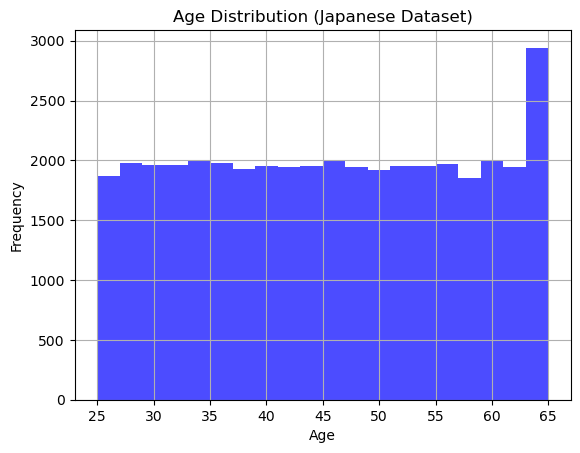

In [308]:
jpn_data['CURR_AGE'].hist(bins=20, color='blue', alpha=0.7)
plt.title("Age Distribution (Japanese Dataset)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

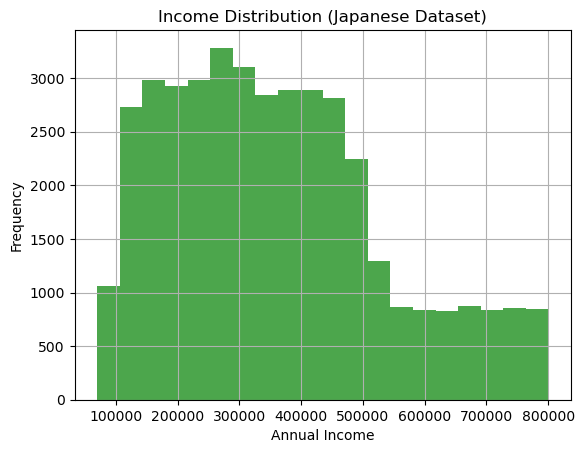

In [309]:
jpn_data['ANN_INCOME'].hist(bins=20, color='green', alpha=0.7)
plt.title("Income Distribution (Japanese Dataset)")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

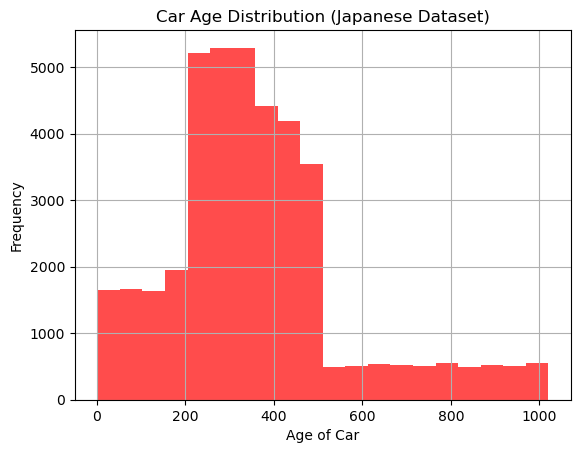

In [310]:
jpn_data['AGE_CAR'].hist(bins=20, color='red', alpha=0.7)
plt.title("Car Age Distribution (Japanese Dataset)")
plt.xlabel("Age of Car")
plt.ylabel("Frequency")
plt.show()

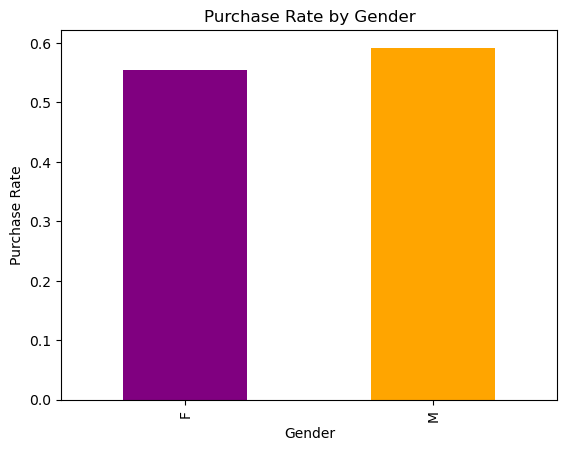

In [311]:
purchase_rate = jpn_data.groupby('GENDER')['PURCHASE'].mean()
purchase_rate.plot(kind='bar', color=['purple', 'orange'])
plt.title("Purchase Rate by Gender")
plt.ylabel("Purchase Rate")
plt.xlabel("Gender")
plt.show()

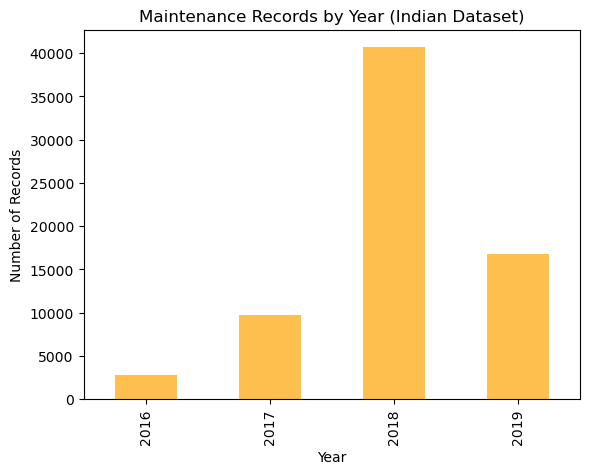

In [312]:
ind_data['DT_MAINT_YEAR'] = ind_data['DT_MAINT'].dt.year
maintenance_trend = ind_data['DT_MAINT_YEAR'].value_counts().sort_index()
maintenance_trend.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Maintenance Records by Year (Indian Dataset)")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()

In [313]:
jpn_data['GENDER'] = jpn_data['GENDER'].map({'F': 0, 'M': 1})
X = jpn_data[['CURR_AGE', 'GENDER', 'ANN_INCOME']]
y = jpn_data['PURCHASE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [314]:
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.59
Precision: 0.66
Recall: 0.60
F1 Score: 0.63

Confusion Matrix:
[[1901 1448]
 [1856 2795]]


In [315]:
ind_data['GENDER'] = ind_data['GENDER'].map({'F': 0, 'M': 1})
ind_data = ind_data.dropna(subset=['CURR_AGE', 'GENDER', 'ANN_INCOME'])
X_ind = ind_data[['CURR_AGE', 'GENDER', 'ANN_INCOME']]
y_ind_pred = model.predict(X_ind)
ind_data['PREDICTED_PURCHASE'] = y_ind_pred
print(ind_data[['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'PREDICTED_PURCHASE']].head()) 

           ID  CURR_AGE  GENDER  ANN_INCOME  PREDICTED_PURCHASE
0  20710B05XL        54       1   1425390.0                   1
1  89602T51HX        47       1   1678954.0                   1
2  70190Z52IP        60       1    931624.0                   1
3  25623V15MU        55       0   1106320.0                   1
4  36230I68CE        32       0    748465.0                   1


In [316]:
purchase_rate_ind = ind_data['PREDICTED_PURCHASE'].mean() * 100
print(f"Predicted Purchase Rate: {purchase_rate_ind:.2f}%")

Predicted Purchase Rate: 96.81%


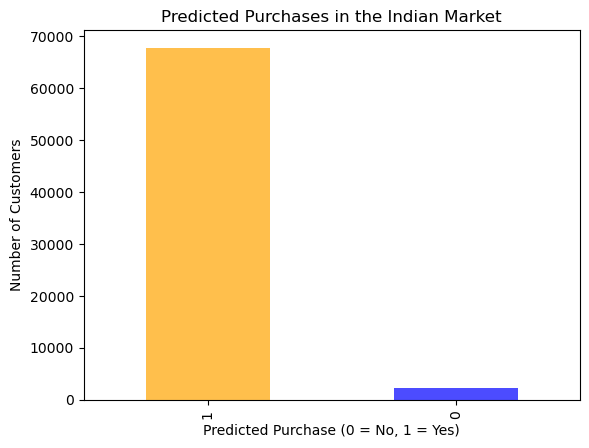

In [345]:
import matplotlib.pyplot as plt
ind_data['PREDICTED_PURCHASE'].value_counts().plot(kind='bar', color=['orange', 'blue'], alpha=0.7)
plt.title("Predicted Purchases in the Indian Market")
plt.xlabel("Predicted Purchase (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

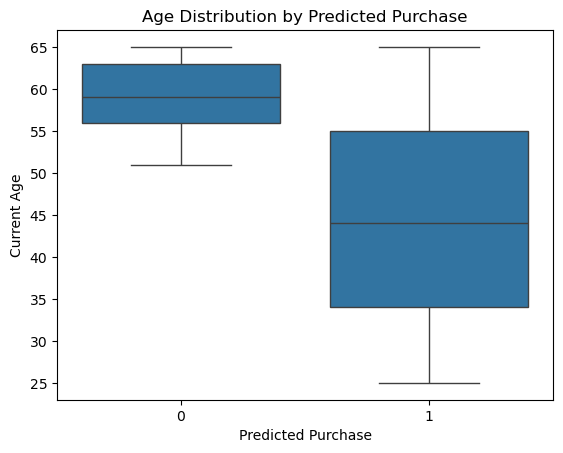

In [347]:
sns.boxplot(x='PREDICTED_PURCHASE', y='CURR_AGE', data=ind_data)
plt.title("Age Distribution by Predicted Purchase")
plt.xlabel("Predicted Purchase")
plt.ylabel("Current Age")
plt.show()

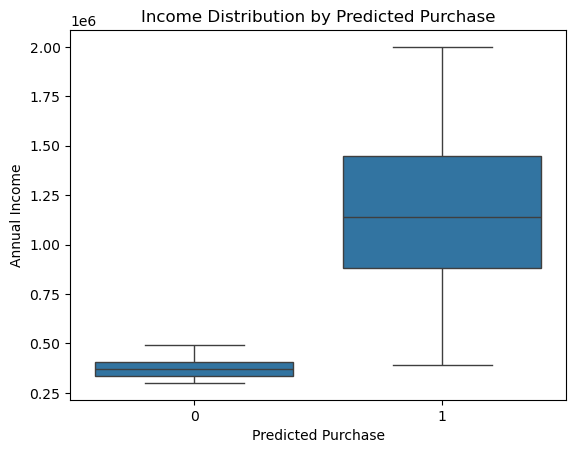

In [349]:
sns.boxplot(x='PREDICTED_PURCHASE', y='ANN_INCOME', data=ind_data)
plt.title("Income Distribution by Predicted Purchase")
plt.xlabel("Predicted Purchase")
plt.ylabel("Annual Income")
plt.show()